Dane wejściowe (x, y):
x: 0.00, y: -0.47
x: 0.20, y: 4.64
x: 0.40, y: 10.81
x: 0.60, y: 16.93
x: 0.80, y: 23.78
x: 1.00, y: 35.19
x: 1.20, y: 54.36
x: 1.40, y: 88.42
x: 1.60, y: 152.34
x: 1.80, y: 263.59
x: 2.00, y: 451.93
x: 2.20, y: 757.01
x: 2.40, y: 1232.61
x: 2.60, y: 1949.75
x: 2.80, y: 2997.66
x: 3.00, y: 4491.06
x: 3.20, y: 6570.15
x: 3.40, y: 9408.59

Wyniki dla funkcji 6x^6 + 5x^2 + 24x + losowa liczba z przedziału [-0.5, 0.5]:

----------------------------------------------------------------------------------------------------
Koeficjenty dla m = 3: [ -319.53187127  2244.30122757 -2594.28849182   805.3340316 ]
Odchylenie standardowe: 251.48574616511397



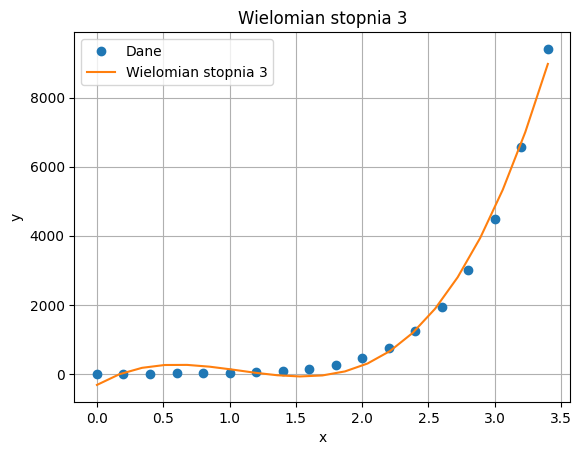

----------------------------------------------------------------------------------------------------
Koeficjenty dla m = 5: [  -4.21480659  124.07779215 -331.26169727  416.5676275  -234.84977877
   61.24641569]
Odchylenie standardowe: 4.14496460538663



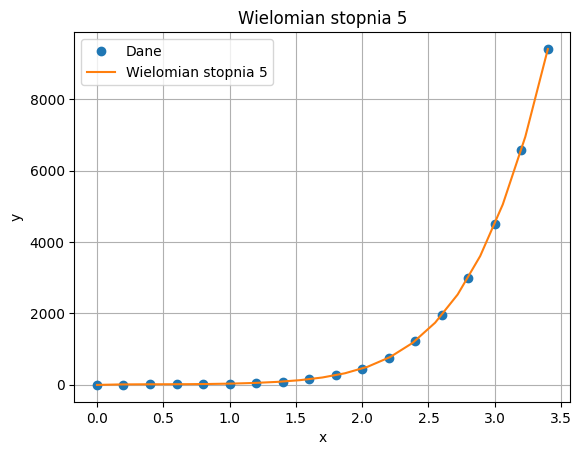

----------------------------------------------------------------------------------------------------
Koeficjenty dla m = 7: [ -0.56573357  28.91172713  -9.09106944  20.6587273  -16.05254697
   6.64562991   4.61287541   0.11492147]
Odchylenie standardowe: 0.30954259342910273



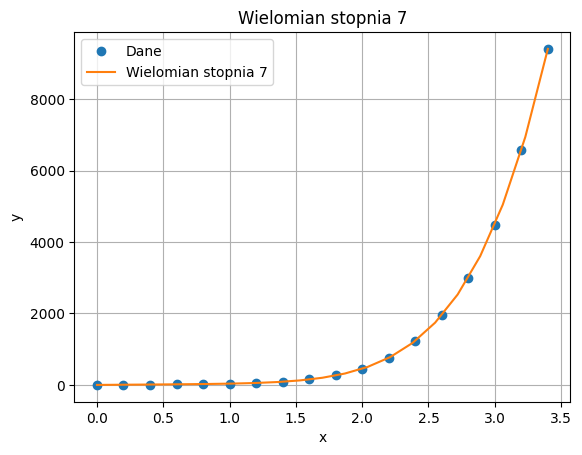

----------------------------------------------------------------------------------------------------
Koeficjenty dla m = 8: [ -0.49061465  21.04570256  40.9302514  -96.24510297 117.95010345
 -76.98286414  33.59660712  -5.12495914   0.38528534]
Odchylenie standardowe: 0.25258631737282344



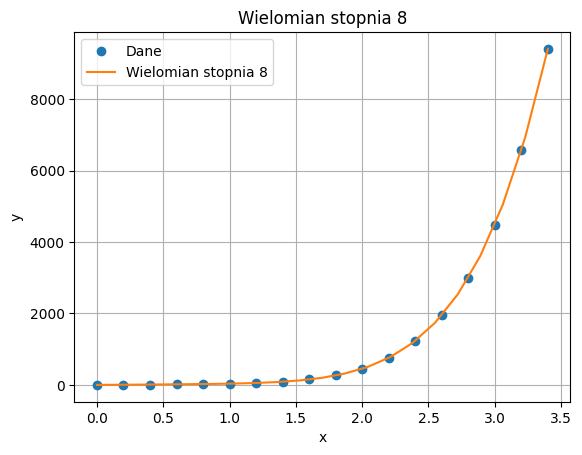

----------------------------------------------------------------------------------------------------
Koeficjenty dla m = 10: [-4.70273314e-01  1.24868487e+01  1.18555783e+02 -3.61174555e+02
  5.82159856e+02 -5.50340595e+02  3.30728874e+02 -1.21598621e+02
  2.81752824e+01 -3.69242716e+00  2.09511258e-01]
Odchylenie standardowe: 0.2695152085728458



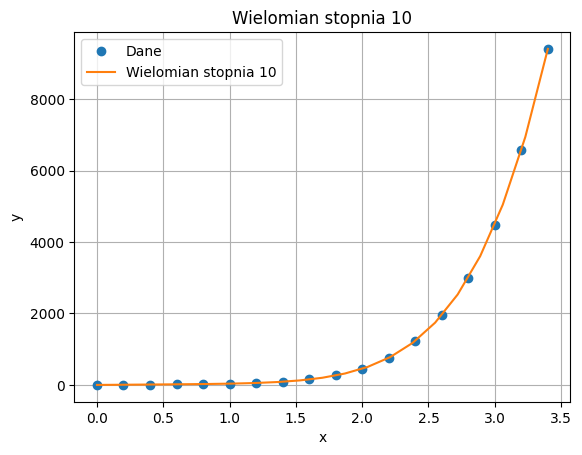

'\nPodany program służy do aproksymacji danych wielomianem różnych stopni i analizy jakości aproksymacji poprzez obliczanie odchylenia standardowego. \nZmodyfikowałem funkcje plotPoly, aby wyświetlała legendę oraz tytuł wykresu dla większej przejrzystości.\nZmniejszyłem też krok danych wejściowych z 0.4 do 0.2, ponieważ przy wielomianie stopnia 10 fragment sigma = math.sqrt(sigma/(n - m)) w funkcji stdDev zwracał wartość ujemną, co powodowało błąd.\nDodałem też wyświetlanie danych wejściowych, aby było wiadomo, jakie dane zostały użyte do aproksymacji, oraz informacje dla jakiej funkcji zostały wygenerowane dane.\nDodałem również wyświetlanie koefficjentów oraz ochylenia standardowego dla każdego stopnia wielomianu, aby łatwiej było porównać wyniki.\nMoje imię i nazwisko to Konrad Binko, a nr mieszkania to 24, stąd funkcja aproksymująca jest postaci 6x^6 + 5x^2 + 24x + losowa liczba z przedziału [-0.5, 0.5]. \nJako że w zadaniu było napisane tylko o funkcji random(), sam zdecydowałem s

In [3]:

import numpy as np
import math
import matplotlib.pyplot as plt
import random


#rownania liniowe: eliminacja Gaussa
def swapRows(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]
        

def swapCols(v,i,j):
    v[:,[i,j]] = v[:,[j,i]]



def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)

    # Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))   
        
    for k in range(0,n-1):
        # Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol:
            print('Matrix is singular')
        if p != k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
            
        # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]

    if abs(a[n-1,n-1]) < tol:
        print('Matrix is singular')
    
    # Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b
    
    
    
#aproksymacja wielomianowa

def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]

        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]

    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]

    return gaussPivot(a,b)
    
    
def stdDev(c,xData,yData):
    
    def evalPoly(c,x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1]
        return p
    
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n+1):
        p = evalPoly(c,xData[i])
        sigma = sigma + (yData[i] - p)**2

    sigma = math.sqrt(sigma/(n - m))
    return sigma
        
  
    
def plotPoly(xData, yData, coeff, xlab='x', ylab='y', m=1):
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1) / 20.0  # wyliczenie kroku
    x = np.arange(x1, x2 + dx / 10.0, dx)
    y = np.zeros((len(x))) * 1.0
    for i in range(m):  # obliczanie wielomianu
        y = y + coeff[i] * x ** i
    plt.plot(xData, yData, 'o', label='Dane')
    plt.plot(x, y, '-', label='Wielomian stopnia ' + str(m-1))
    plt.xlabel(xlab); plt.ylabel(ylab)
    plt.title(f'Wielomian stopnia {m-1}')
    plt.legend()
    plt.grid(True)
    plt.show()
   
def main():
    x = np.arange(0, 3.6, 0.2)  
    a, b, c = 6, 5, 24
    y = [a*x_i**6 + b*x_i**2 + c*x_i + random.uniform(-0.5, 0.5) for x_i in x]
    
    print("Dane wejściowe (x, y):")
    for x_i, y_i in zip(x, y):
        print(f"x: {x_i:.2f}, y: {y_i:.2f}")
    
    print("\nWyniki dla funkcji 6x^6 + 5x^2 + 24x + losowa liczba z przedziału [-0.5, 0.5]:\n")


    for m in [3, 5, 7, 8, 10]:
        coeff = polyFit(x, y, m)
        print("-"*100)
        print(f"Współczynniki dla m = {m}: {coeff}")
        print(f"Odchylenie standardowe: {stdDev(coeff, x, y)}\n")
        plotPoly(x, y, coeff, m=m)



if __name__ == "__main__":
    main()

'''
Podany program służy do aproksymacji danych wielomianem różnych stopni i analizy jakości aproksymacji poprzez obliczanie odchylenia standardowego. 
Zmodyfikowałem funkcje plotPoly, aby wyświetlała legendę oraz tytuł wykresu dla większej przejrzystości.
Zmniejszyłem też krok danych wejściowych z 0.4 do 0.2, ponieważ przy wielomianie stopnia 10 fragment sigma = math.sqrt(sigma/(n - m)) w funkcji stdDev zwracał wartość ujemną, co powodowało błąd.
Dodałem też wyświetlanie danych wejściowych, aby było wiadomo, jakie dane zostały użyte do aproksymacji, oraz informacje dla jakiej funkcji zostały wygenerowane dane.
Dodałem również wyświetlanie współczynników oraz ochylenia standardowego dla każdego stopnia wielomianu, aby łatwiej było porównać wyniki.
Moje imię i nazwisko to Konrad Binko, a nr mieszkania to 24, stąd funkcja aproksymująca jest postaci 6x^6 + 5x^2 + 24x + losowa liczba z przedziału [-0.5, 0.5]. 
Jako że w zadaniu było napisane tylko o funkcji random(), sam zdecydowałem się na losowanie liczby z przedziału [-0.5, 0.5], aby uzyskać większą różnorodność danych.

Wnioski z wykresów:
- im większy stopień wielomianu, tym mniejsze odchylenie standardowe, a co za tym idzie, lepsza aproksymacja
- przy zbyt dużym stopniu wielomianu, współczynniki zostają wyrażone w notacji naukowej, co może być niepożądane
Podsumowując, im większy stopień wielomianu, tym lepsza aproksymacja, ale zbyt duży stopień może powodować problemy z czytelnością danych.
Dlatego też trzeba pójść na kompromis i odpowiednio dobrać stopień wielomianu do podanych danych. Dla mojego zestawu danych najlepszym wyborem jest wielomian stopnia 8, stąd "nadprogramowo" załączyłem go w programie.
'''